In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns

import math

import warnings
warnings.filterwarnings('ignore')

path = '..'

# import os
# os.chdir(path)

In [2]:
df = pd.read_csv(f'{path}/dataset/GetSBProfileInfoService/getOtlInfo/all.csv')

In [3]:
df['지역'] = df['bizAreaNm'].apply(lambda x: x.split(' ') if len(x.split(' '))>2 else list(x.split(' '))+[''] if len(x.split(' '))==2 else list(x.split(' '))+['',''])
df['지역'] = df['지역'].apply(
    lambda x: (x + ['']) if x[0].endswith('도') else ([''] + x)
)
df['지역_도'] = df['지역'].apply(lambda x: x[0])
df['지역_시'] = df['지역'].apply(lambda x: x[1])
df['지역_구'] = df['지역'].apply(lambda x: x[2])
df['지역_세부'] = df['지역'].apply(lambda x: x[3])

df.loc[df['지역_도'] == '강원도', '지역_도'] = '강원특별자치도'
# 충청남도 수정 (대전광역시, 세종특별자치시)
df.loc[df['지역_시'].isin(['대전광역시', '세종특별자치시']), '지역_도'] = '충청남도'
# 전라남도 수정 (광주광역시)
df.loc[df['지역_시'].isin(['광주광역시']), '지역_도'] = '전라남도'
# 경상북도 수정 (대구광역시)
df.loc[df['지역_시'].isin(['대구광역시']), '지역_도'] = '경상북도'
# 경상남도 수정 (울산광역시, 부산광역시)
df.loc[df['지역_시'].isin(['울산광역시', '부산광역시']), '지역_도'] = '경상남도'
# 경기도 수정 (서울특별시, 인천광역시)
df.loc[df['지역_시'].isin(['서울특별시', '인천광역시']), '지역_도'] = '경기도'

In [4]:
tmp = pd.read_csv(f'{path}/dataset/업종분류.csv')
df=df.merge(tmp, on=['bizBzcCd','bizBzcCdNm'])

In [5]:
tmp = df.groupby(['basYm','지역_도','대분류'])['지역'].count().rename('count').reset_index()

In [6]:
tmp.sort_values(['지역_도', '대분류', 'basYm'], inplace=True)
tmp['growth_rate'] = tmp.groupby(['지역_도', '대분류'])['count'].pct_change() * 100

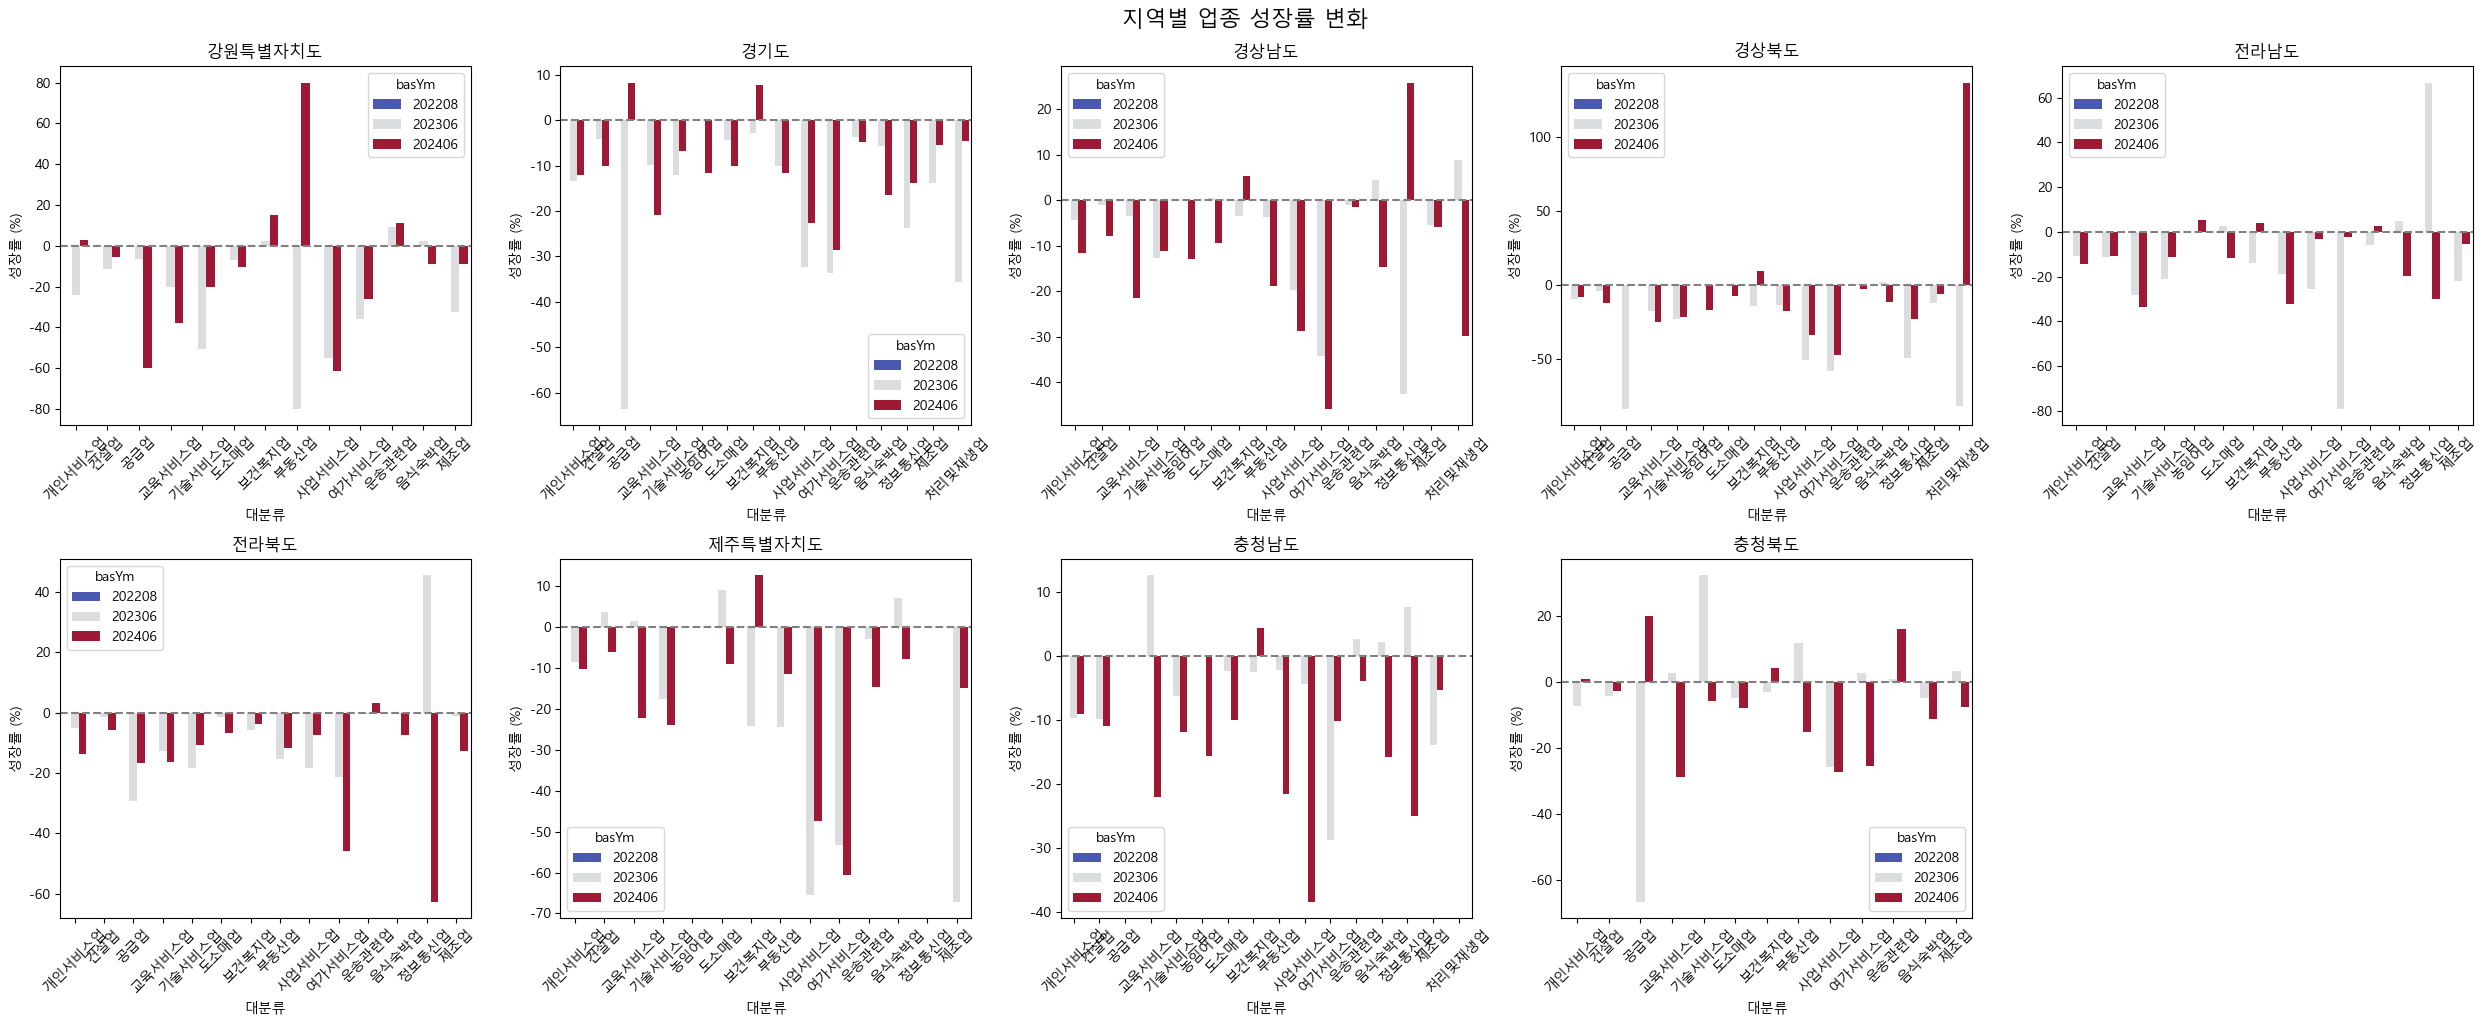

In [ ]:
regions = tmp['지역_도'].unique()
n_regions = len(regions)

# subplot 설정
cols = 5
rows = math.ceil(n_regions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()  # 2D -> 1D 배열로

# 지역별로 반복해서 막대그래프 그리기
for i, region in enumerate(regions):
    ax = axes[i]
    data = tmp[tmp['지역_도'] == region]
    sns.barplot(data=data, x='대분류', y='growth_rate',hue='basYm', ax=ax, palette="coolwarm")
    ax.set_title(f'{region}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_ylabel('증가률 (%)')

# 남은 subplot은 빈칸으로 처리
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('지역별 업종 증가률 변화', fontsize=16, y=1.02)
plt.show()